<div style="background-color: #FFCFCF; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #333;"><strong>AirBnB Listings and reviews</strong></h1>
</div>

<img src="https://miro.medium.com/v2/resize:fit:3000/1*FyZktqFMhrQD3swFaNun2g.jpeg" width=1200>

<div style="background-color: #0000; padding: 20px; border-radius: 10px;font-size:25px;font-weight:10px">
  <h1 style="color: #333;"><strong>Exploratory Data Analysis</strong></h1>
</div>

<div style="background-color: #FFCFCF; padding: 25px; border-radius: 10px;font-weight:10px">
  <h1 style="color: #333;"><strong>Importing Libraries</strong></h1>
</div>

In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

<div style="background-color: #FFCFCF; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Loading and Checking the dataset</strong></h1>
</div>

reviews_dict = pd.read_csv(r"/kaggle/input/airbnb-listings-reviews/Airbnb Data/Reviews_data_dictionary.csv")

reviews_dict

reviews_dict.head()

In [46]:
reviews = pd.read_csv(r"/kaggle/input/airbnb-listings-reviews/Airbnb Data/Reviews.csv")

In [47]:
reviews

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859
...,...,...,...,...
5373138,47779342,726766332,2021-01-25,283094516
5373139,47823964,727963021,2021-01-31,76411977
5373140,47896175,728548625,2021-02-02,71370946
5373141,47900451,727399287,2021-01-29,109011160


In [48]:
reviews.head()

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859


In [49]:
listing_dict = pd.read_csv(r"/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings_data_dictionary.csv")

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
listing_dict

,Field,Description
0,listing_id,Listing ID
1,name,Listing Name
2,host_id,Host ID
3,host_since,Date the Host joined Airbnb
4,host_location,Location where the Host is based
5,host_response_time,Estimate of how long the Host takes to respond
6,host_response_rate,Percentage of times the Host responds
7,host_acceptance_rate,Percentage of times the Host accepts a booking...
8,host_is_superhost,Binary field to determine if the Host is a Sup...
9,host_total_listings_count,Total listings the Host has in Airbnb


In [52]:
listing_dict.head()

,Field,Description
0,listing_id,Listing ID
1,name,Listing Name
2,host_id,Host ID
3,host_since,Date the Host joined Airbnb
4,host_location,Location where the Host is based


In [53]:
listing = pd.read_csv(r"/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings.csv",encoding = "ISO-8859-1",low_memory=False)

In [54]:
listing

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [55]:
listing.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [56]:
listing.describe()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.797120e+05,2.797120e+05,150930.000000,166625.000000,279547.000000,279712.000000,279712.000000,279712.000000,250277.000000,279712.000000,279712.000000,2.797120e+05,188307.000000,187999.000000,188047.000000,187941.000000,188025.000000,187937.000000,187927.000000
mean,2.638196e+07,1.081658e+08,0.865939,0.827168,24.581612,18.761862,12.595075,3.288736,1.515509,608.792737,8.050967,2.755860e+04,93.405195,9.565476,9.312869,9.701534,9.698593,9.633994,9.335364
std,1.442576e+07,1.108570e+08,0.283744,0.289202,284.041143,32.560343,73.081309,2.133379,1.153080,3441.826611,31.518946,7.282875e+06,10.070437,0.990878,1.146072,0.867434,0.886884,0.833234,1.042625
min,2.577000e+03,1.822000e+03,0.000000,0.000000,0.000000,-34.264400,-99.339630,0.000000,1.000000,0.000000,1.000000,1.000000e+00,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.384462e+07,1.720656e+07,0.900000,0.780000,1.000000,-22.964390,-43.198040,2.000000,1.000000,75.000000,1.000000,4.500000e+01,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,2.767098e+07,5.826911e+07,1.000000,0.980000,1.000000,40.710785,2.382780,2.000000,1.000000,150.000000,2.000000,1.125000e+03,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,3.978485e+07,1.832853e+08,1.000000,1.000000,4.000000,41.908610,28.986730,4.000000,2.000000,474.000000,5.000000,1.125000e+03,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.834353e+07,3.901874e+08,1.000000,1.000000,7235.000000,48.904910,151.339810,16.000000,50.000000,625216.000000,9999.000000,2.147484e+09,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [57]:
# PARIS DATA ANALYSIS

# COLUMNS AND ROWS FILTERING

<div style="background-color: #FFCFCF; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Information About the dataset</strong></h1>
</div>

In [58]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

<div style="background-color: #FFCFCF; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Finding the number of Hosts added by the year</strong></h1>
</div>

In [59]:
listing["host_since"]= pd.to_datetime(listing["host_since"]) #converting starting into date

In [60]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

<div style="background-color: #FFCFCF; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Columns and Rows Filtering</strong></h1>
</div>

In [61]:
type(listing)

pandas.core.frame.DataFrame

In [62]:
listing["city"]

0         Paris
1         Paris
2         Paris
3         Paris
4         Paris
          ...  
279707    Paris
279708    Paris
279709    Paris
279710    Paris
279711    Paris
Name: city, Length: 279712, dtype: object

In [63]:
listing["city"].value_counts()

city
Paris             64690
New York          37012
Sydney            33630
Rome              27647
Rio de Janeiro    26615
Istanbul          24519
Mexico City       20065
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Name: count, dtype: int64

<div style="background-color: #FFCFCF; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Paris City Data Analysis</strong></h1>
</div>

In [64]:
paris_listing = listing.query("city=='Paris'")

In [65]:
paris_listing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   listing_id                   64690 non-null  int64         
 1   name                         64627 non-null  object        
 2   host_id                      64690 non-null  int64         
 3   host_since                   64657 non-null  datetime64[ns]
 4   host_location                64522 non-null  object        
 5   host_response_time           23346 non-null  object        
 6   host_response_rate           23346 non-null  float64       
 7   host_acceptance_rate         31919 non-null  float64       
 8   host_is_superhost            64657 non-null  object        
 9   host_total_listings_count    64657 non-null  float64       
 10  host_has_profile_pic         64657 non-null  object        
 11  host_identity_verified       64657 non-null  

<div style="background-color: #FFCFCF; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Checking if there are missing values in the dataset</strong></h1>
</div>

In [66]:
paris_listing = listing.query("city=='Paris'").loc[:,["host_since","neighbourhood","city","accommodates","price"]]

In [67]:
paris_listing.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


In [68]:
paris_listing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [69]:
paris_listing.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [70]:
paris_listing.dropna(how = "any",inplace = True)

In [71]:
paris_listing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64657 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64657 non-null  object        
 2   city           64657 non-null  object        
 3   accommodates   64657 non-null  int64         
 4   price          64657 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [72]:
paris_listing.describe()

,host_since,accommodates,price
count,64657,64657.000000,64657.000000
mean,2015-11-01 11:06:05.528867584,3.037877,113.104614
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588382,214.479626


In [73]:
paris_listing.describe(include="object")

,neighbourhood,city
count,64657,64657
unique,20,1
top,Buttes-Montmartre,Paris
freq,7232,64657


In [74]:
paris_listing[paris_listing["accommodates"]==0].count(axis = 0)

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [75]:
paris_listing[paris_listing["price"]==0].count(axis = 0)

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [76]:
paris_listing[(paris_listing["price"]==0) & (paris_listing["accommodates"]!=0)]

,host_since,neighbourhood,city,accommodates,price
207075,2019-07-22,Vaugirard,Paris,2,0
207076,2019-10-31,Enclos-St-Laurent,Paris,2,0
208301,2019-05-27,Palais-Bourbon,Paris,2,0
208302,2019-07-19,Pantheon,Paris,3,0
208854,2016-09-16,Louvre,Paris,3,0
208855,2019-11-06,Luxembourg,Paris,3,0
208856,2019-12-02,Elysee,Paris,3,0
208857,2019-12-17,Opera,Paris,2,0


In [77]:
paris_listing = paris_listing[paris_listing["price"]!=0]

In [78]:
paris_listing

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,2015-07-16,Popincourt,Paris,2,105


In [79]:
paris_listing.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


In [80]:
paris_listing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64595 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64595 non-null  datetime64[ns]
 1   neighbourhood  64595 non-null  object        
 2   city           64595 non-null  object        
 3   accommodates   64595 non-null  int64         
 4   price          64595 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [81]:
paris_listing

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,2015-07-16,Popincourt,Paris,2,105


In [82]:
#cleaning completed

In [83]:
#Paris data Analsis

In [84]:
#Average price

In [85]:
paris_listing_neighbourhood = paris_listing.groupby("neighbourhood").agg({"price":"mean"}).sort_values("price",ascending=False).round(2)

In [86]:
paris_listing_neighbourhood

,price
neighbourhood,
Elysee,211.37
Louvre,175.75
Passy,161.29
Palais-Bourbon,157.51
Luxembourg,155.79
Bourse,149.63
Hotel-de-Ville,144.52
Temple,138.43
Pantheon,122.98


In [87]:
paris_Elysee_accommodate = paris_listing.query("neighbourhood=='Elysee'")

In [88]:
paris_Elysee_accommodate

,host_since,neighbourhood,city,accommodates,price
2,2014-07-31,Elysee,Paris,2,89
14,2015-12-30,Elysee,Paris,2,35
128,2015-03-26,Elysee,Paris,2,75
137,2015-08-23,Elysee,Paris,2,90
260,2014-07-18,Elysee,Paris,2,110
...,...,...,...,...,...
278484,2016-07-22,Elysee,Paris,2,98
279043,2016-05-09,Elysee,Paris,2,75
279117,2014-11-20,Elysee,Paris,2,100
279299,2014-09-30,Elysee,Paris,2,87


In [89]:
paris_Elysee_accommodates = paris_listing.query("neighbourhood=='Elysee'").groupby("accommodates").agg({"price":"mean"}).sort_values("price",ascending=False).round(2)

In [90]:
paris_Elysee_accommodates

,price
accommodates,
14,971.00
13,842.50
11,805.00
16,800.00
12,529.62
10,500.86
9,440.27
7,411.54
8,405.52


In [91]:
paris_listing["host_since"].nunique()

3854

In [92]:
paris_listing_over_time = paris_listing.set_index("host_since").resample("Y").agg({"neighbourhood":"count","price":"mean"})

In [93]:
paris_listing_over_time

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615
2013-12-31,8142,107.096414
2014-12-31,10922,100.253800
2015-12-31,12147,103.646250
2016-12-31,8867,114.211345


In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
paris_listing_neighbourhood

,price
neighbourhood,
Elysee,211.37
Louvre,175.75
Passy,161.29
Palais-Bourbon,157.51
Luxembourg,155.79
Bourse,149.63
Hotel-de-Ville,144.52
Temple,138.43
Pantheon,122.98


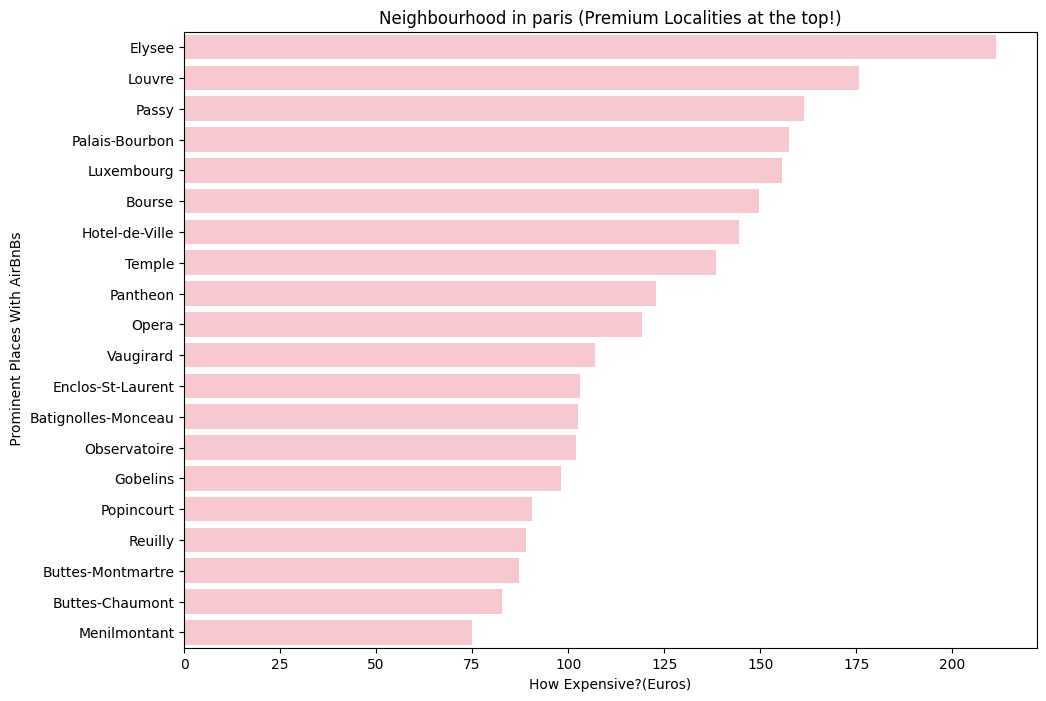

In [96]:
plt.figure(figsize =(11,8))
sns.barplot(data = paris_listing_neighbourhood,
           x = "price",
           y= paris_listing_neighbourhood.index,
           color = "pink")
plt.title("Neighbourhood in paris (Premium Localities at the top!)")
plt.xlabel("How Expensive?(Euros)")
plt.ylabel(" Prominent Places With AirBnBs")


plt.show()


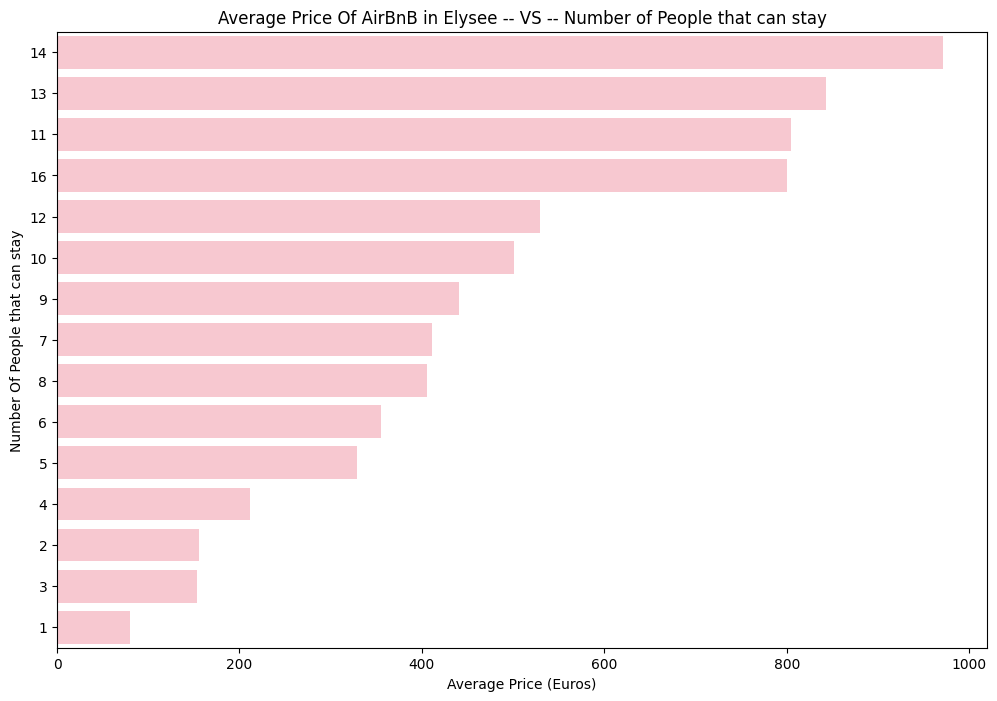

In [97]:
plt.figure(figsize = (12,8))
sns.barplot(data = paris_Elysee_accommodates,
           x = "price",
           y = paris_Elysee_accommodates.index,
           color = "pink",
           orient = "h",
           order = paris_Elysee_accommodates.index)
plt.title("Average Price Of AirBnB in Elysee -- VS -- Number of People that can stay")
plt.xlabel("Average Price (Euros)")
plt.ylabel("Number Of People that can stay")
plt.show()

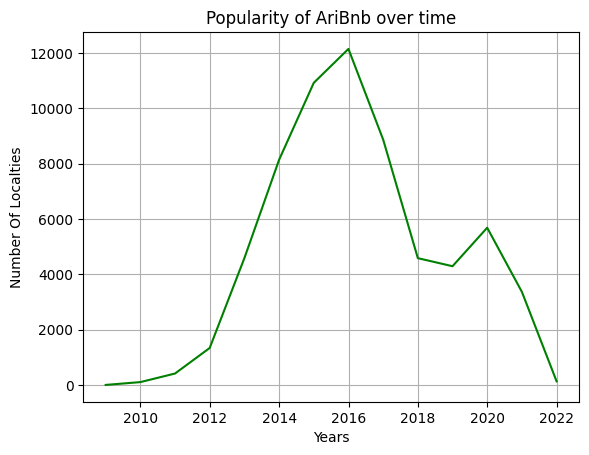

In [98]:
sns.lineplot(data = paris_listing_over_time["neighbourhood"],color ="green")
plt.xlabel("Years")
plt.ylabel("Number Of Localties")
plt.title("Popularity of AriBnb over time")
plt.grid(True)
plt.show()


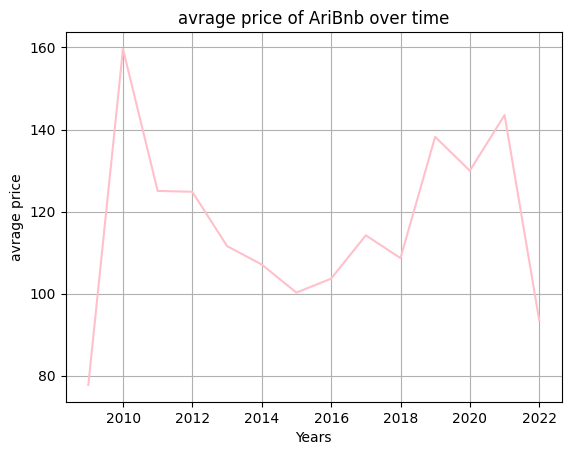

In [99]:
sns.lineplot(data = paris_listing_over_time["price"],color ="pink")
plt.xlabel("Years")
plt.ylabel("avrage price")
plt.title("avrage price of AriBnb over time")
plt.grid(True)
plt.show()

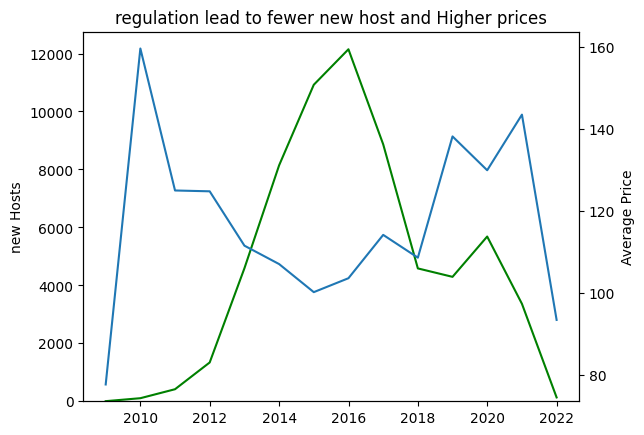

In [100]:
fig,ax = plt.subplots()
ax.plot(paris_listing_over_time.index,paris_listing_over_time["neighbourhood"],label = "new Hosts",c = "green")
ax.set_ylabel("new Hosts")
ax2 = ax.twinx()
ax2.plot(paris_listing_over_time.index,paris_listing_over_time["price"],label = "Average price ")
ax.set_ylim(0)
ax2.set_ylabel("Average Price")
ax.set_title("regulation lead to fewer new host and Higher prices")
plt.show()

[](http://)

> > 